## 6 Modelling / Cluster Analyse

- wir erstellen eine Clusteranalyse um die Segment der Personen gut ableiten zu können

6.1  k-means Verfahren / später besser mit PCA oder SVD, dann aber mit transformation zurück
- Auswahl der Cluster
	•	Silhouette Score (auf X_model bzw. Distanzmatrix)
	•	Calinski-Harabasz
	•	Davies-Bouldin
- speichern der cluster label

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling  
import missingno as msno
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

%matplotlib inline

In [2]:
# Zielverzeichnis (bitte anpassen)
TARGET_DIR = r"/Users/danielmini/Projekte/data_analyics26/data_analytics_master/2_data_acquisition/processed_data"

# CSV-Datei finden und laden
csv_files = [f for f in os.listdir(TARGET_DIR) if f.endswith(".csv")]
df = pd.read_csv(os.path.join(TARGET_DIR, csv_files[1]))

print("DataFrame geladen:", df.shape)

DataFrame geladen: (19158, 53)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Library/Frameworks/Python.framework/Versions/3.13/lib/p

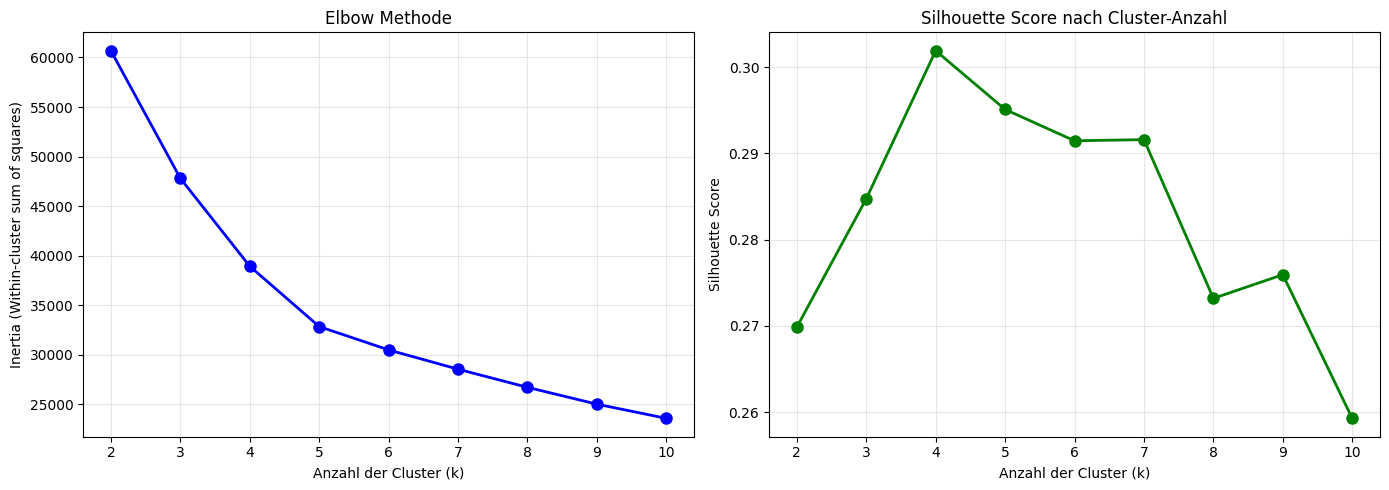

Silhouette Scores:
k=2: 0.2699
k=3: 0.2847
k=4: 0.3019
k=5: 0.2951
k=6: 0.2915
k=7: 0.2916
k=8: 0.2732
k=9: 0.2759
k=10: 0.2593


In [4]:
# Vorbereitung: Numerische Features für Clustering
X_model = df.select_dtypes(include=[np.number]).drop('enrollee_id', axis=1)

# Elbow Methode - verschiedene k-Werte testen
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_model)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_model, kmeans.labels_))

# Visualisierung der Elbow Methode
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Anzahl der Cluster (k)')
axes[0].set_ylabel('Inertia (Within-cluster sum of squares)')
axes[0].set_title('Elbow Methode')
axes[0].grid(True, alpha=0.3)

axes[1].plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Anzahl der Cluster (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score nach Cluster-Anzahl')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Silhouette Scores:")
for k, score in zip(k_range, silhouette_scores):
    print(f"k={k}: {score:.4f}")

In [5]:
# K-means für k=4 und k=5 anwenden
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)

labels_4 = kmeans_4.fit_predict(X_model)
labels_5 = kmeans_5.fit_predict(X_model)

# DataFrame mit enrollee_id und Cluster-Labels erstellen
cluster_results = pd.DataFrame({
  'enrollee_id': df['enrollee_id'],
  'cluster_k4': labels_4,
  'cluster_k5': labels_5
})

print("Cluster Results DataFrame:")
print(cluster_results.head())
print(f"\nShape: {cluster_results.shape}")

# Mit Rohdaten verbinden
# df_with_clusters = df.merge(cluster_results, on='enrollee_id', how='left')
# print(f"\nDataFrame mit Cluster-Labels: {df_with_clusters.shape}")

Cluster Results DataFrame:
   enrollee_id  cluster_k4  cluster_k5
0         8949           3           4
1        29725           2           2
2        11561           0           1
3        33241           0           0
4          666           2           2

Shape: (19158, 3)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Library/Frameworks/Python.framework/Versions/3.13/lib/p

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Library/Frameworks/Python.framework/Versions/3.13/lib/p

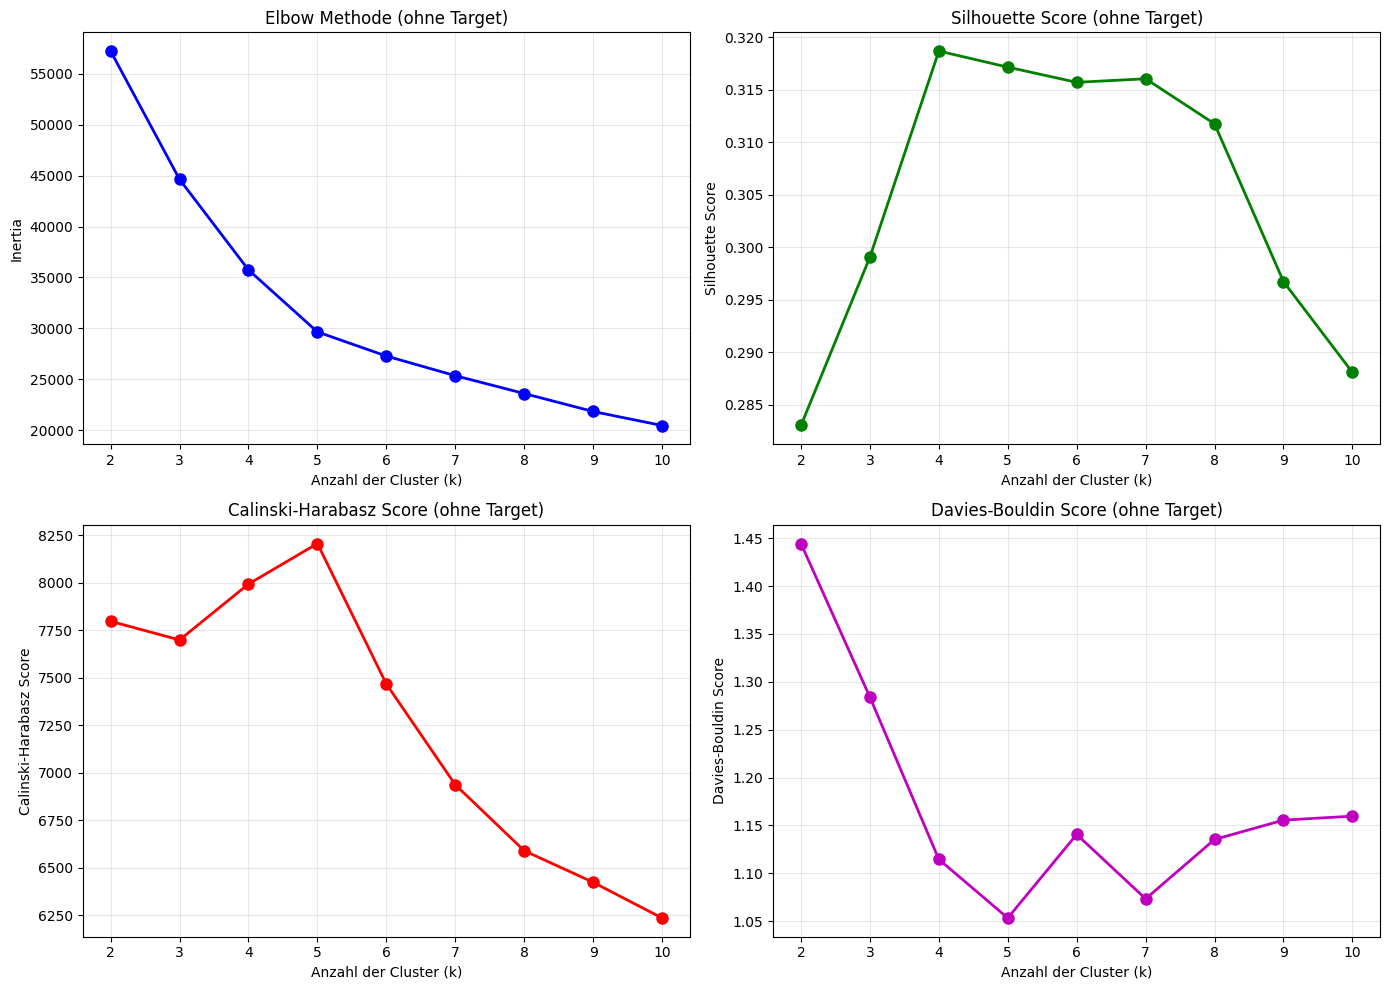

Evaluierungsmetriken ohne Target:

k	Silhouette	Calinski	Davies-Bouldin
2	0.2830		7796.70		1.4443
3	0.2991		7698.51		1.2840
4	0.3187		7992.79		1.1146
5	0.3171		8205.95		1.0533
6	0.3157		7466.50		1.1406
7	0.3160		6936.19		1.0734
8	0.3117		6588.84		1.1354
9	0.2967		6422.65		1.1556
10	0.2881		6234.62		1.1597


In [6]:
# Vorbereitung: Numerische Features ohne 'target' für Clustering
X_model_no_target = df.select_dtypes(include=[np.number]).drop(['enrollee_id', 'target'], axis=1)

# Elbow Methode - verschiedene k-Werte testen
inertias_no_target = []
silhouette_scores_no_target = []
calinski_scores_no_target = []
davies_bouldin_scores_no_target = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_model_no_target)
    inertias_no_target.append(kmeans.inertia_)
    silhouette_scores_no_target.append(silhouette_score(X_model_no_target, kmeans.labels_))
    calinski_scores_no_target.append(calinski_harabasz_score(X_model_no_target, kmeans.labels_))
    davies_bouldin_scores_no_target.append(davies_bouldin_score(X_model_no_target, kmeans.labels_))

# Visualisierung
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(k_range, inertias_no_target, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Anzahl der Cluster (k)')
axes[0, 0].set_ylabel('Inertia')
axes[0, 0].set_title('Elbow Methode (ohne Target)')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(k_range, silhouette_scores_no_target, 'go-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Anzahl der Cluster (k)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette Score (ohne Target)')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(k_range, calinski_scores_no_target, 'ro-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Anzahl der Cluster (k)')
axes[1, 0].set_ylabel('Calinski-Harabasz Score')
axes[1, 0].set_title('Calinski-Harabasz Score (ohne Target)')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(k_range, davies_bouldin_scores_no_target, 'mo-', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Anzahl der Cluster (k)')
axes[1, 1].set_ylabel('Davies-Bouldin Score')
axes[1, 1].set_title('Davies-Bouldin Score (ohne Target)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Evaluierungsmetriken ohne Target:")
print("\nk\tSilhouette\tCalinski\tDavies-Bouldin")
for k, sil, cal, db in zip(k_range, silhouette_scores_no_target, calinski_scores_no_target, davies_bouldin_scores_no_target):
    print(f"{k}\t{sil:.4f}\t\t{cal:.2f}\t\t{db:.4f}")

In [7]:
# K-means für k=4 und k=5 mit X_model_no_target anwenden
kmeans_4_no_target = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_5_no_target = KMeans(n_clusters=5, random_state=42, n_init=10)

labels_4_no_target = kmeans_4_no_target.fit_predict(X_model_no_target)
labels_5_no_target = kmeans_5_no_target.fit_predict(X_model_no_target)

# DataFrame mit enrollee_id und Cluster-Labels erstellen (ohne Target)
cluster_results_no_target = pd.DataFrame({
    'enrollee_id': df['enrollee_id'],
    'cluster_k4_no_target': labels_4_no_target,
    'cluster_k5_no_target': labels_5_no_target
})

print("Cluster Results DataFrame (ohne Target):")
print(cluster_results_no_target.head())
print(f"\nShape: {cluster_results_no_target.shape}")

# Beide Cluster-Ergebnisse zusammenführen
# cluster_results_combined = cluster_results.merge(cluster_results_no_target, on='enrollee_id', how='left')
# print(f"\nKombinierte Cluster-Ergebnisse:")
# print(cluster_results_combined.head())
# print(f"Shape: {cluster_results_combined.shape}")

Cluster Results DataFrame (ohne Target):
   enrollee_id  cluster_k4_no_target  cluster_k5_no_target
0         8949                     3                     0
1        29725                     1                     3
2        11561                     2                     1
3        33241                     2                     2
4          666                     1                     3

Shape: (19158, 3)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Library/Frameworks/Python.framework/Versions/3.13/lib/p

In [8]:
# laden der cleaned Daten
df_cleaned = pd.read_csv(os.path.join(TARGET_DIR, "cleaned_data.csv"))

In [ ]:
# merge cleaned data mit cluster results
df_merged = df_cleaned.merge(cluster_results_no_target, on='enrollee_id', how='left')
df_merged = df_merged.merge(cluster_results, on='enrollee_id', how='left')  
print(f"\nDataFrame mit Cluster-Labels: {df_merged.shape}") 


DataFrame mit Cluster-Labels: (19158, 18)


In [10]:
df_merged.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,training_hours,target,experience_ord,last_new_job_ord,cluster_k4_no_target,cluster_k5_no_target,cluster_k4,cluster_k5
0,8949,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,No Answer,No Answer,36,1.0,21.0,1.0,3,0,3,4
1,29725,city_40,0.776,Male,0,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,47,0.0,15.0,5.0,1,3,2,2
2,11561,city_21,0.624,No Answer,0,Full time course,Graduate,STEM,No Answer,No Answer,83,0.0,5.0,0.0,2,1,0,1
3,33241,city_115,0.789,No Answer,0,No Answer,Graduate,Business Degree,No Answer,Pvt Ltd,52,1.0,0.0,0.0,2,2,0,0
4,666,city_162,0.767,Male,1,no_enrollment,Masters,STEM,50-99,Funded Startup,8,0.0,21.0,4.0,1,3,2,2


In [13]:

# Speichern des neuen Datensatzes im processed_data-Verzeichnis
output_path = os.path.join(TARGET_DIR, "v_processed_data_cluster.csv")
df_merged.to_csv(output_path, index=False)

print(f"Datensatz mit Cluster-Labels gespeichert unter:\n{output_path}")

Datensatz mit Cluster-Labels gespeichert unter:
/Users/danielmini/Projekte/data_analyics26/data_analytics_master/2_data_acquisition/processed_data/v_processed_data_cluster.csv
